In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# from autoimpute 

In [145]:
data = pd.read_csv('listings.csv')
pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)
np.set_printoptions(threshold=np.inf)
pd.set_option('display.width', 1000)


In [146]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18666,https://www.airbnb.com/rooms/18666,20190917034823,2019-09-17,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",Nice apartment situated on the penthouse floor...,"Apartment located near the ""Plaza de las Glori...",none,Apartment in Barcelona near to the Plaza de la...,NaN,"Good transports connections, 50 m from the met...",Free Wifi - air conditioning. We will provide ...,We can provide you all kind of entrance and ti...,Cleaning fee: 40 euros (to pay at arrival) Tou...,NaN,NaN,https://a0.muscache.com/im/pictures/47f88bc6-6...,NaN,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Cataluña, Spain","We are Mireia (39) & Maria (41), two multiling...",within an hour,95%,NaN,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,El Camp de l'Arpa del Clot,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",Sant Martí,el Camp de l'Arpa del Clot,Sant Martí,Barcelona,CT,08026,Barcelona,"Barcelona, Spain",ES,Spain,41.40889,2.18555,t,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",75.0,$130.00,NaN,NaN,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,3 weeks ago,t,0,0,0,251,2019-09-17,1,0,2015-10-10,2015-10-10,80.0,10.0,10.0,2.0,10.0,10.0,8.0,t,HUTB-003004,NaN,f,f,flexible,f,f,31,31,0,0,0.02
1,18674,https://www.airbnb.com/rooms/18674,20190917034823,2019-09-17,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment with 110 m2 located in the 6th floor...,110m2 apartment to rent in Barcelona. Located ...,none,Apartment in Barcelona located in the heart of...,NaN,"Good transport connection, 150 m from metro “...",Free Wifi - air conditioning. We will provide ...,We can provide you all kind of entrance and ti...,Tourist tax at arrival: 2.48 Eur/person/night ...,NaN,NaN,https://a0.muscache.com/im/pictures/13031453/4...,NaN,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Cataluña, Spain","We are Mireia (39) & Maria (41), two multiling...",within an hour,95%,NaN,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/use

In [5]:
drop = data.columns[(data.isnull().mean()*100) > 80] 
# Thesse are the columns which has Nan values more than 80 % of its data.
# These can be dropped 
drop

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'jurisdiction_names'], dtype='object')

In [6]:
data.isnull().mean() * 100

id                                                0.000000
listing_url                                       0.000000
scrape_id                                         0.000000
last_scraped                                      0.000000
name                                              0.073515
summary                                           5.606744
space                                            27.180945
description                                       2.465203
experiences_offered                               0.000000
neighborhood_overview                            34.498138
notes                                            53.229759
transit                                          40.050970
access                                           47.706332
interaction                                      43.447363
house_rules                                      33.380710
thumbnail_url                                   100.000000
medium_url                                      100.0000

In [7]:
data.drop(drop, 1 ,inplace = True)


In [8]:
df = data.iloc[:,22:]

In [9]:
# data.host_neighbourhood.value_counts()

In [10]:
# data.amenities.value_counts()

In [11]:
df.shape

(20404, 76)

In [12]:
data.room_type.value_counts()

Private room       10408
Entire home/apt     9063
Hotel room           776
Shared room          157
Name: room_type, dtype: int64

In [13]:
print(data.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'm

In [150]:
co = data.columns.to_list()[:-1]
ar = np.array(co)
res = ar.reshape(5,21)
pd.DataFrame(res).T.to_csv('feature_all.csv')

In [15]:
col_to_drop = ['host_thumbnail_url','host_picture_url','host_neighbourhood','street', 'neighbourhood', 
               'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 
               'smart_location', 'country_code', 'country', 'latitude', 'longitude','calendar_updated','calendar_last_scraped',
              'first_review','last_review','license']

In [16]:
df.drop(col_to_drop,axis = 1, inplace = True)

In [17]:
df.shape

(20404, 55)

In [18]:
df.head(3)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within an hour,95%,f,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$130.00,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,t,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,t,f,f,flexible,f,f,31,31,0,0,0.02
1,within an hour,95%,f,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,t,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$60.00,$150.00,$50.00,2,$30.00,1,1125,1,5,1125,1125,1.9,1125.0,t,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,t,t,f,strict_14_with_grace_period,f,f,31,31,0,0,0.21
2,within a few hours,100%,f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$33.00,$100.00,NaN,1,$10.00,2,1125,2,4,1125,1125,2.1,1125.0,t,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,f,moderate,f,f,2,0,2,0,3.05


In [19]:
df.host_response_time.value_counts()

within an hour        12246
within a few hours     3030
within a day           2329
a few days or more      269
Name: host_response_time, dtype: int64

##### EDA

###### checking and imputing the null values

In [20]:
df.shape

(20404, 55)

In [21]:
[((df.isnull().mean() >= 0.001) & (df.isnull().mean() <= 0.3)).values]

[array([ True,  True,  True,  True,  True, False,  True,  True, False,
        False, False, False, False, False,  True, False, False, False,
         True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
         True])]

In [22]:
null = pd.DataFrame()
pd.DataFrame({'name':df.isnull().sum().index,'bool':((df.isnull().mean() >= 0.001) & (df.isnull().mean() <= 0.3)).values,
              'percent':df.isnull().mean().values,'count': df.isnull().sum().values})

,name,bool,percent,count
0,host_response_time,True,0.123995,2530
1,host_response_rate,True,0.123995,2530
2,host_is_superhost,True,0.001078,22
3,host_listings_count,True,0.001078,22
4,host_total_listings_count,True,0.001078,22
5,host_verifications,False,0.000000,0
6,host_has_profile_pic,True,0.001078,22
7,host_identity_verified,True,0.001078,22
8,is_location_exact,False,0.000000,0
9,property_type,False,0.000000,0


In [23]:
df[df['host_is_superhost'].isna()].head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
829,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",$99.00,$400.00,$40.00,2,$15.00,1,1125,1,1,1125,1125,1.0,1125.0,t,4,18,48,316,71,28,89.0,9.0,9.0,10.0,10.0,9.0,9.0,t,t,f,moderate,f,f,12,12,0,0,0.98
831,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Entire home/apt,2,0.5,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",""...",$79.00,$500.00,$40.00,2,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,t,1,3,25,294,76,20,87.0,9.0,9.0,10.0,10.0,9.0,8.0,t,t,f,strict_14_with_grace_period,f,f,12,12,0,0,1.08
1067,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Dog...",$57.00,$100.00,$15.00,3,$20.00,30,60,30,30,60,60,30.0,60.0,t,28,58,88,363,18,0,93.0,9.0,9.0,10.0,10.0,10.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.24
1686,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$110.00,$500.00,$40.00,2,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,t,3,3,3,171,54,23,92.0,9.0,9.0,9.0,10.0,9.0,9.0,t,t,f,strict_14_with_grace_period,f,f,12,12,0,0,0.80
1826,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,t,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$110.00,$400.00,$40.00,2,$10.00,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,214,59,11,87.0,9.0,9.0,9.0,9.0,9.0,8.0,t,t,f,strict_14_with_grace_period,f,f,12,12,0,0,1.07


In [24]:
dafa = df[~(df.host_is_superhost.isnull())]  # dropping the null values in the super host columns 

In [25]:
dafa.shape

(20382, 55)

In [152]:
co = dafa.columns.to_list()
ar = np.array(co)
res = ar.reshape(5,11)
pd.DataFrame(res).T.to_csv('feature_sele.csv')

In [27]:
dafa.columns = pd.to_numeric(dafa.columns, errors = 'ignore')

In [28]:
dafa.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'instant_bookable', 'is_business_travel_ready',
       'canc

In [29]:
bools_col = dafa[['host_has_profile_pic','host_identity_verified','host_is_superhost','is_location_exact','requires_license',
   'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture','require_guest_phone_verification','has_availability']]

In [30]:
def bools(x):
    if x == 'f':
        return False
    elif x == 't':
        return True

In [31]:
for i in  bools_col.columns:
    dafa[i] = bools_col[i].apply(bools)

In [32]:
dafa.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within an hour,95%,False,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,True,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$130.00,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,True,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,True,False,False,flexible,False,False,31,31,0,0,0.02
1,within an hour,95%,False,47.0,47.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,True,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$60.00,$150.00,$50.00,2,$30.00,1,1125,1,5,1125,1125,1.9,1125.0,True,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,True,False,strict_14_with_grace_period,False,False,31,31,0,0,0.21
2,within a few hours,100%,False,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",$33.00,$100.00,NaN,1,$10.00,2,1125,2,4,1125,1125,2.1,1125.0,True,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,True,False,False,moderate,False,False,2,0,2,0,3.05
3,within an hour,100%,True,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,False,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",$210.00,$300.00,$80.00,3,$10.00,3,1125,3,5,1125,1125,3.1,1125.0,True,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,True,True,False,strict_14_with_grace_period,False,True,2,2,0,0,0.47
4,within an hour,100%,True,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",$45.00,NaN,NaN,1,$25.00,1,730,1,1,730,730,1.0,730.0,True,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,True,True,False,strict_14_with_grace_period,True,True,1,0,1,0,2.29


In [33]:
amenities_df = dafa.copy() 

In [34]:
for i in ['host_verifications','amenities']:
    dafa[i] = dafa[i].apply(lambda x : len(x.split(',')))
# converting the values from list to count of values in the index

In [35]:
#Create a function to get ammenities

def get_amenities(column):
    am_list=[]
    for am in column:
        am=am.replace('"','')
        am=am.replace('{','')
        am=am.replace('}','')
        am_list += am.split(',')

    #am_list=am_list.remove('translation missing: en.hosting_amenity_50')    
    #am_list=am_list.remove('translation missing: en.hosting_amenity_49')
    
    am_list2=pd.DataFrame(am_list) #Transform list into a data frame

    am_list2.rename(columns={0:'amenities'},inplace=True) #replace name to categories

    am_list2=am_list2.groupby('amenities')['amenities'].count().sort_values(ascending=False) #group by category and count.
    am_list2.rename(columns={'amenities':'count'},inplace=True) #Rename column to count to then drop one level
    am_list2.reset_index(level=0)
    return am_list2

In [36]:
#Get amenities

amenities=get_amenities(amenities_df.amenities) #Total

amenities = amenities.drop(['translation missing: en.hosting_amenity_50'],axis=0)

amenities = amenities.drop(['translation missing: en.hosting_amenity_49'],axis=0)

amenities

amenities/amenities.sum()*100 #Percentage of total tags

(amenities[0:35]/amenities.sum()*100).sum()

amenities[0:35]

amenities
Wifi                           19893
Essentials                     19085
Kitchen                        17811
Hangers                        16572
Hair dryer                     15754
Washer                         15488
Heating                        15350
Iron                           14805
TV                             14130
Shampoo                        12918
Hot water                      12630
Elevator                       12264
Air conditioning               11861
Laptop friendly workspace      11302
Refrigerator                    9087
Dishes and silverware           8580
Bed linens                      8171
Microwave                       8123
Host greets you                 7629
Coffee maker                    7616
Cooking basics                  7238
Family/kid friendly             7097
Oven                            6853
No stairs or steps to enter     6212
Stove                           6206
Smoking allowed                 5071
Paid parking off premises   

In [37]:
dafa.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within an hour,95%,False,47.0,47.0,5,True,True,True,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,18,$130.00,$150.00,$42.00,2,$25.00,3,730,3,3,730,730,3.0,730.0,True,0,0,0,251,1,0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,True,False,False,flexible,False,False,31,31,0,0,0.02
1,within an hour,95%,False,47.0,47.0,5,True,True,True,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,22,$60.00,$150.00,$50.00,2,$30.00,1,1125,1,5,1125,1125,1.9,1125.0,True,13,31,43,52,16,11,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,True,False,strict_14_with_grace_period,False,False,31,31,0,0,0.21
2,within a few hours,100%,False,2.0,2.0,6,True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,41,$33.00,$100.00,NaN,1,$10.00,2,1125,2,4,1125,1125,2.1,1125.0,True,3,3,3,3,125,31,90.0,10.0,9.0,10.0,10.0,9.0,9.0,True,False,False,moderate,False,False,2,0,2,0,3.05
3,within an hour,100%,True,5.0,5.0,8,True,True,False,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,46,$210.00,$300.00,$80.00,3,$10.00,3,1125,3,5,1125,1125,3.1,1125.0,True,10,33,56,326,49,17,94.0,10.0,10.0,10.0,10.0,9.0,9.0,True,True,False,strict_14_with_grace_period,False,True,2,2,0,0,0.47
4,within an hour,100%,True,1.0,1.0,8,True,True,True,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,17,$45.00,NaN,NaN,1,$25.00,1,730,1,1,730,730,1.0,730.0,True,10,31,41,77,254,48,95.0,10.0,10.0,10.0,10.0,10.0,10.0,True,True,False,strict_14_with_grace_period,True,True,1,0,1,0,2.29


In [38]:
dafa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20382 entries, 0 to 20403
Data columns (total 55 columns):
host_response_time                              17874 non-null object
host_response_rate                              17874 non-null object
host_is_superhost                               20382 non-null bool
host_listings_count                             20382 non-null float64
host_total_listings_count                       20382 non-null float64
host_verifications                              20382 non-null int64
host_has_profile_pic                            20382 non-null bool
host_identity_verified                          20382 non-null bool
is_location_exact                               20382 non-null bool
property_type                                   20382 non-null object
room_type                                       20382 non-null object
accommodates                                    20382 non-null int64
bathrooms                                       20375 non-n

In [39]:
# Let us check the significance of each feature with respect to target price

###### converting categorical features to numerical

In [40]:
da = dafa.copy()

In [41]:
dafa.host_response_rate = dafa.host_response_rate.str.replace('%','').astype(float)
dafa.security_deposit = dafa.security_deposit.str.replace('$','')
dafa.security_deposit = dafa.security_deposit.str.replace(',','')
dafa.security_deposit = dafa.security_deposit.str.replace('.','').astype(float)

dafa.cleaning_fee = dafa.cleaning_fee.str.replace('$','').astype(float)
dafa.extra_people = dafa.extra_people.str.replace('$','').astype(float)

dafa.price = dafa.price.str.replace('$','')
dafa.price = dafa.price.str.replace(',','')
# dafa.price = dafa.price.str.replace('.','').astype(float)
# 

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
col_label = ['host_response_time','property_type','room_type','bed_type','cancellation_policy']

In [44]:
for i in dafa.columns:
    dafa[i] = pd.to_numeric(dafa[i], errors = 'ignore')

In [45]:
dafa[col_label].isnull().sum()

host_response_time     2508
property_type             0
room_type                 0
bed_type                  0
cancellation_policy       0
dtype: int64

In [46]:
pd.crosstab(da['host_is_superhost'],da['host_response_time'])

host_response_time,a few days or more,within a day,within a few hours,within an hour
host_is_superhost,,,,
False,267,2157,2355,9566
True,2,172,675,2680


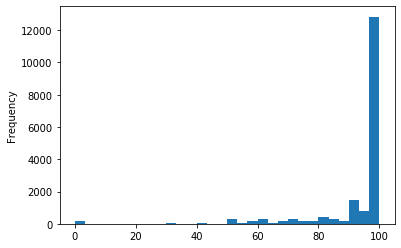

In [47]:
dafa.host_response_rate.plot(kind = 'hist',bins = 30)

###### FIlling missing values using iterative imputer

In [48]:
# from fancyimpute import MICE
# #We use the dafa dataframe that feature selected.
# #fancy impute removes column names.
# dafa_list = list(dafa)
# # Use MICE to fill in each row's missing features
# dafa = pd.DataFrame(MICE(verbose=False).complete(dafa))
# dafa.columns = dafa_list

In [49]:
# dafa[dafa.review_scores_accuracy.isna()]

In [50]:
missing_values = dafa.columns[dafa.isnull().sum()>0]

In [51]:
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [52]:
# Subset numeric features: numeric_cols
numeric_cols = dafa.select_dtypes(include = ['int64','float64'])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
dafa_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
dafa_imp_iterDF = pd.DataFrame(dafa_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(dafa_imp_iterDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20382 entries, 0 to 20381
Data columns (total 40 columns):
host_response_rate                              20382 non-null float64
host_listings_count                             20382 non-null float64
host_total_listings_count                       20382 non-null float64
host_verifications                              20382 non-null float64
accommodates                                    20382 non-null float64
bathrooms                                       20382 non-null float64
bedrooms                                        20382 non-null float64
beds                                            20382 non-null float64
amenities                                       20382 non-null float64
price                                           20382 non-null float64
security_deposit                                20382 non-null float64
cleaning_fee                                    20382 non-null float64
guests_included                        

In [53]:
len(dafa_imp_iterDF.isnull().sum())

40

In [54]:
dafa[dafa_imp_iterDF.columns] = dafa_imp_iterDF

In [55]:
# ## Fill missing values in Age feature with each sex’s mean value of ## Age 
# dafa.host_response_time.fillna(dafa.groupby('host_is_superhost')['host_response_time'].transform("mean"), inplace=True)

In [56]:
dafa.host_response_time = dafa.host_response_time.fillna(dafa.host_response_time.mode()[0])

In [57]:
dafa.isnull().sum().sum()

880

In [58]:
# dafa_imp_iterDF

In [59]:
dafa.shape

(20382, 55)

In [60]:
dafa.dropna(inplace = True)

In [61]:
dafa.shape

(20360, 55)

In [62]:
# dafa.isnull().sum()

In [63]:
# dafa.info()

###### EDA

In [64]:
cols_dist = dafa.select_dtypes(exclude = ['object','bool']).columns.to_list()

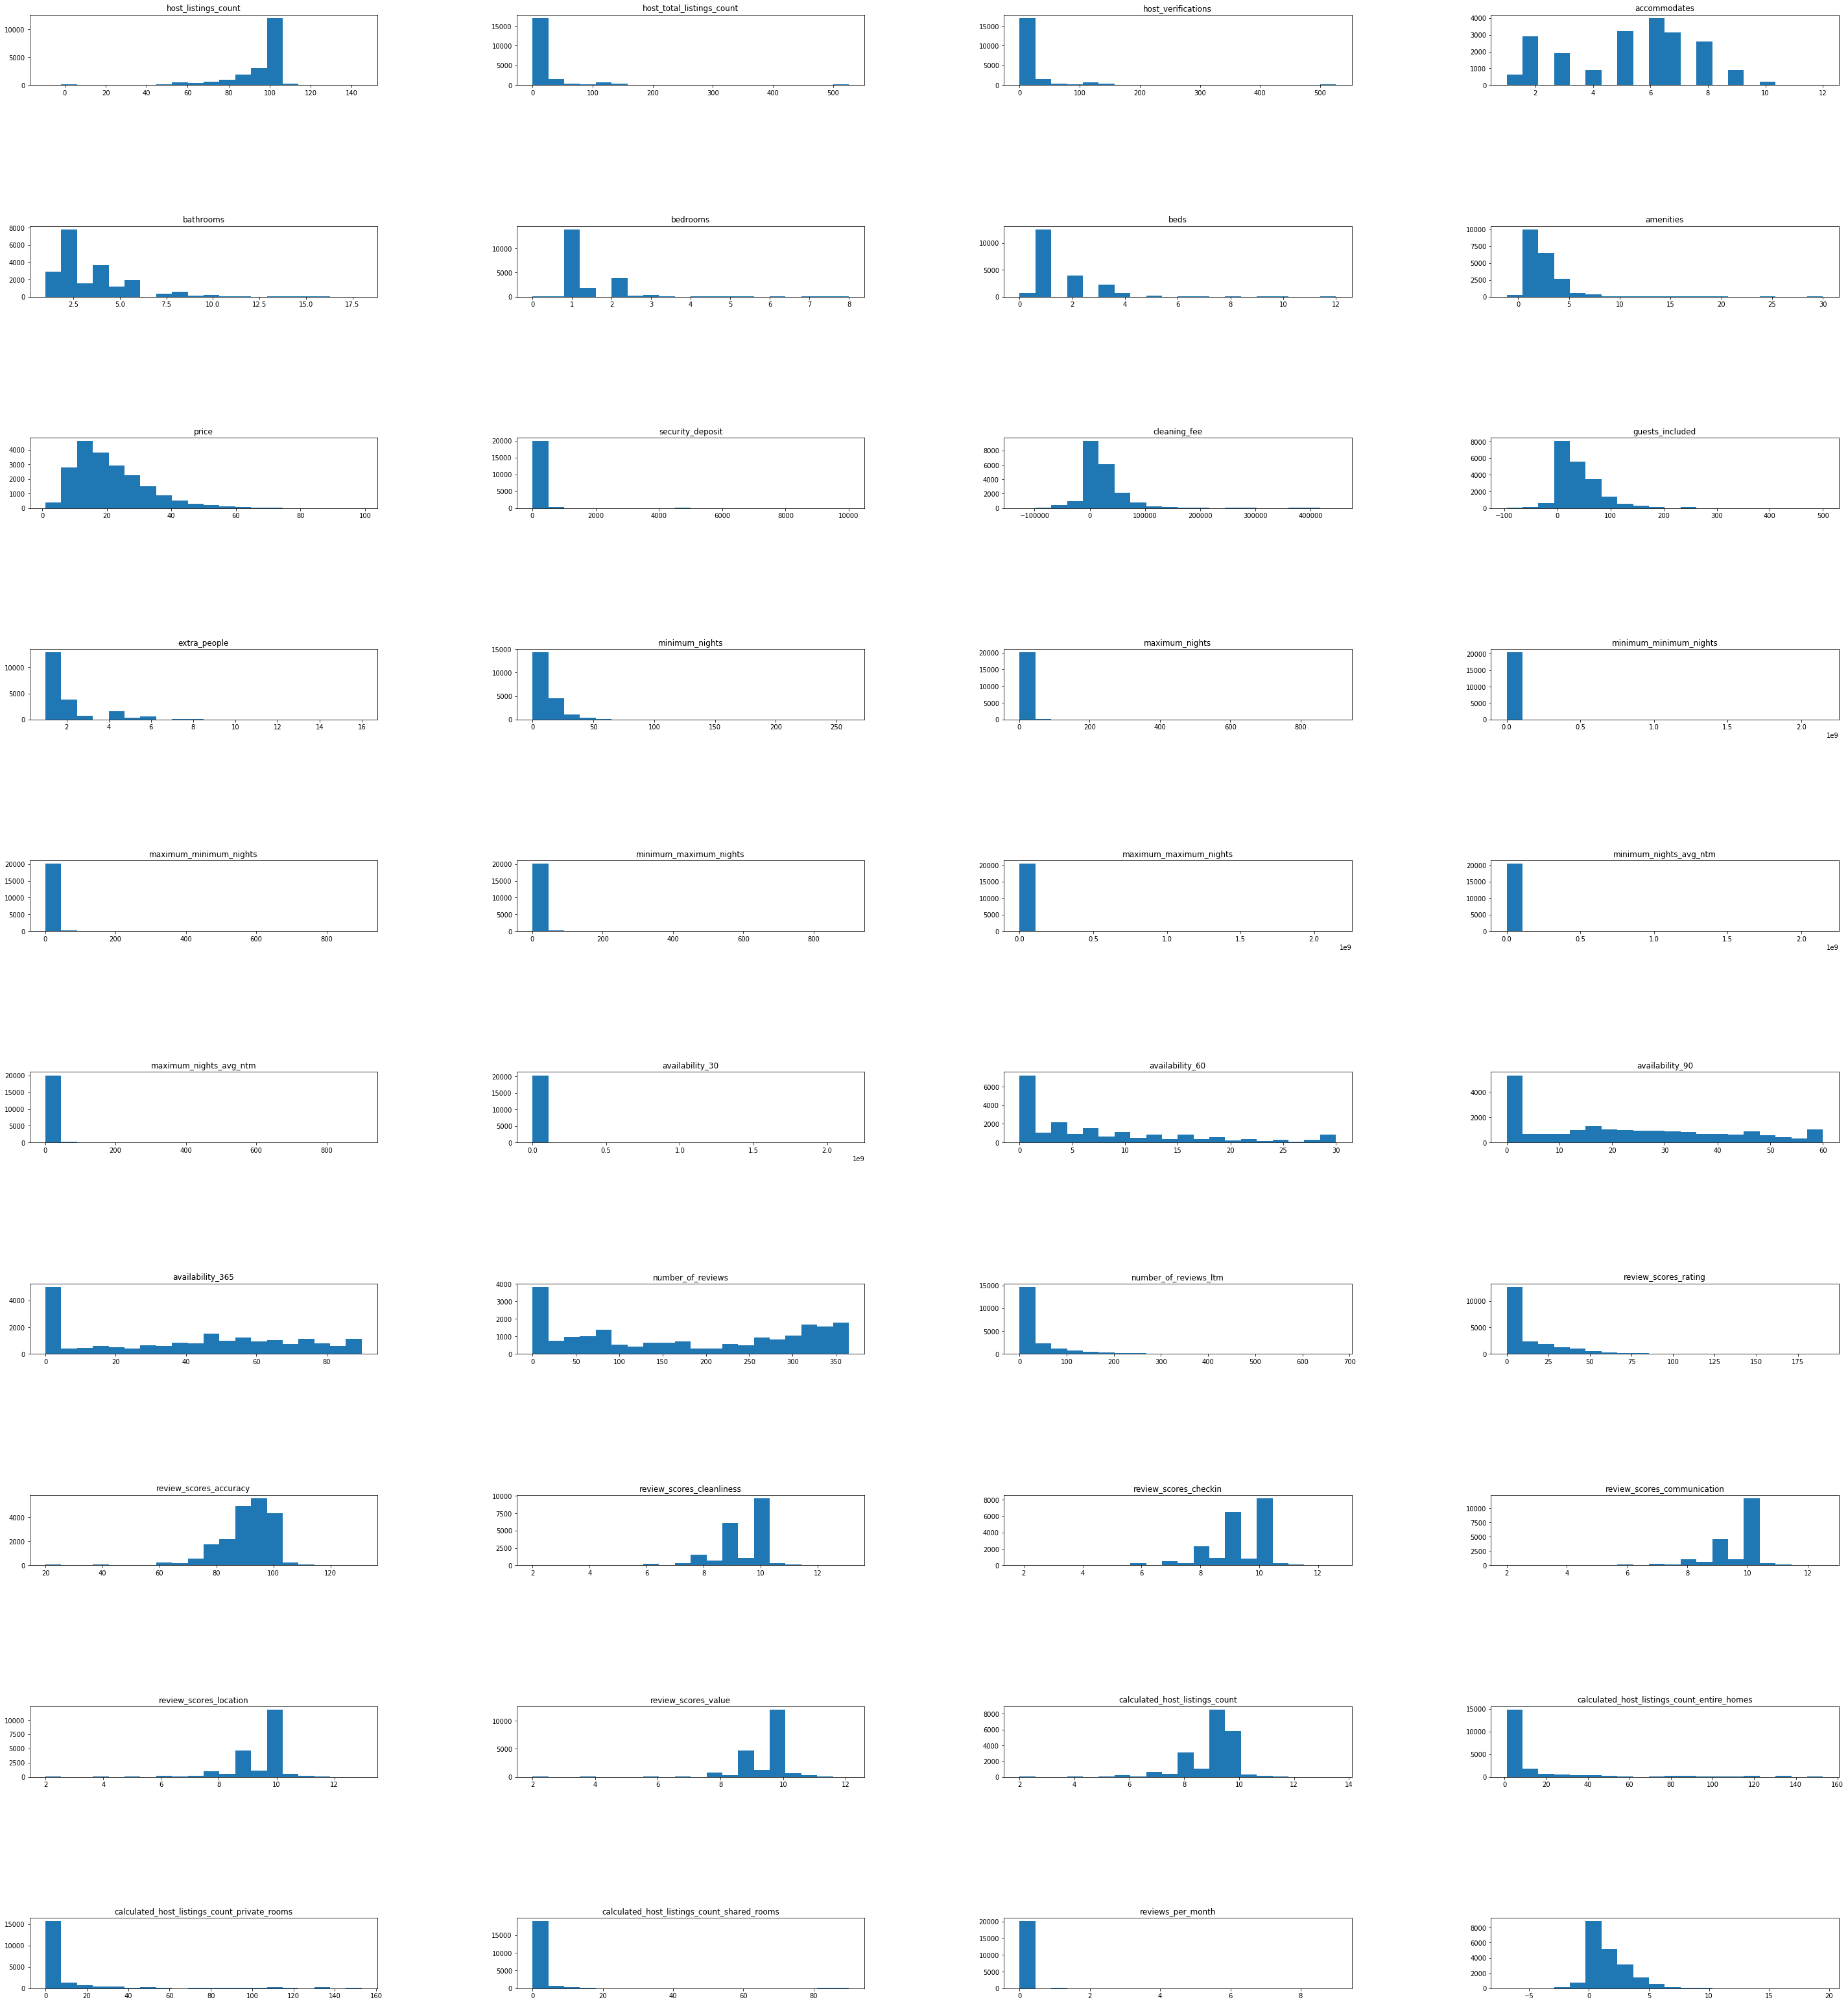

In [65]:
fig = plt.figure(figsize=(50,80))
fig.subplots_adjust(hspace=2, wspace=0.4)

for i,j in enumerate(cols_dist):
    plt.title(j)
    plt.subplot(14,4, i+1)
    plt.hist(dafa[j], bins = 20 )
    

In [66]:
dafa.to_csv('listings_new.csv')

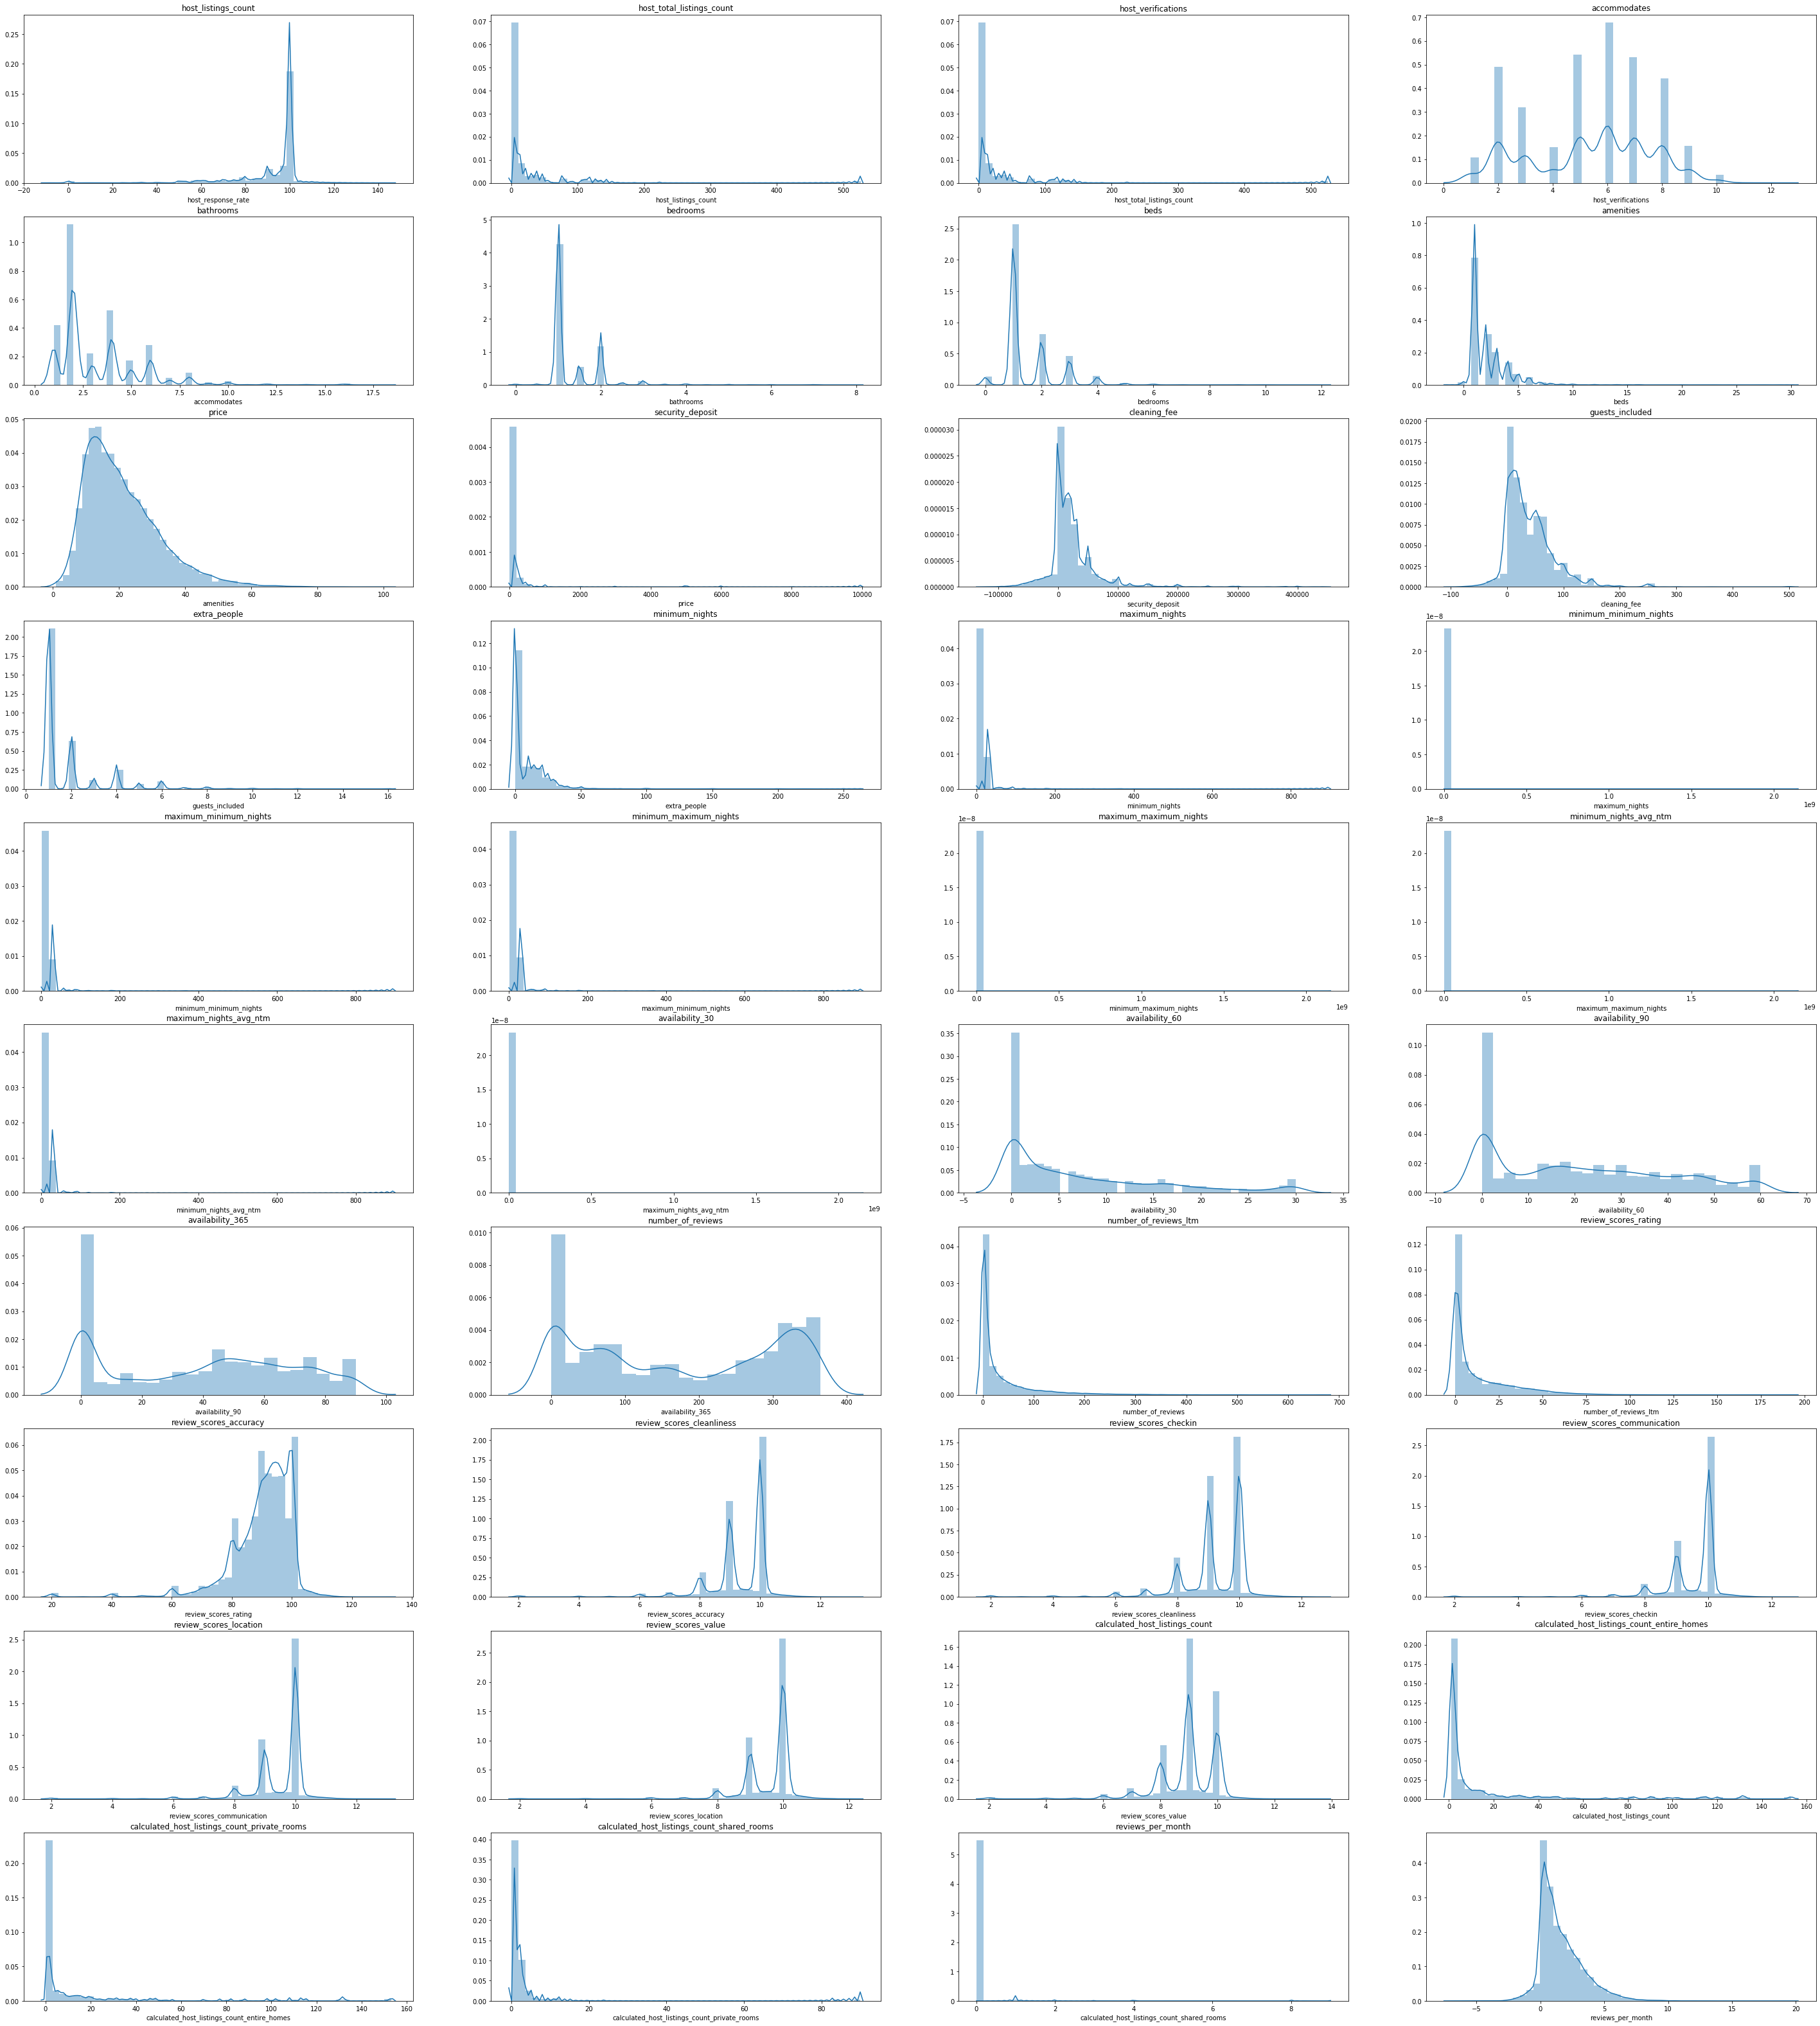

In [67]:
plt.figure(figsize=(50,80))
fig.subplots_adjust(hspace=10, wspace=0.4)

for i,j in enumerate(cols_dist):
    plt.title(j)
    plt.subplot(14,4, i+1)
    sns.distplot(dafa[j])
    

In [68]:
# The price is right skewed


In [69]:
dafa.price.skew()

12.264027705930522

In [70]:
q1 = dafa.price.quantile(0.25)
q3 = dafa.price.quantile(0.75)

iqr = q3-q1

ho = q3 + 1.5* iqr
lo = q1 - 1.5 * iqr

dafa_in = dafa[(~(dafa.price < lo) | (dafa.price > ho))]
dafa_in.shape

(20360, 55)

In [71]:
dafa_out = dafa[(dafa.price < lo) | (dafa.price > ho)]
dafa_out.shape

(1640, 55)

In [72]:
# There are 1640 outlier but all the values are scraped from the listings and thus it need not be removed

###### Label Encoding

In [73]:
col_label

['host_response_time',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [74]:
da = dafa.copy()

In [75]:
le = LabelEncoder()

for i in col_label:
    da[i] = le.fit_transform(da[i])


###### VIF

In [76]:
# # using the vif method we can remove multicollinearity
# X = da.drop(['price','log_price'],1)

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]

KeyError: "['log_price'] not found in axis"

In [ ]:
# # removing collinear variables
# # function definition

# def calculate_vif(x):
#     thresh = 2.0
#     output = pd.DataFrame()
#     k = x.shape[1]
#     vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
#     for i in range(1,k):
#         a = np.argmax(vif)
#         print("REMOVED MAX VIF AND INDEX.:")
#         print(a,'-', np.max(vif))
#         if vif[a] <= thresh :
#             break
#         if i == 1 :          
#             output = x.drop(x.columns[a], axis = 1)
#             vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
#         elif i > 1 :
#             output = output.drop(output.columns[a],axis = 1)
#             vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
#     return(output)

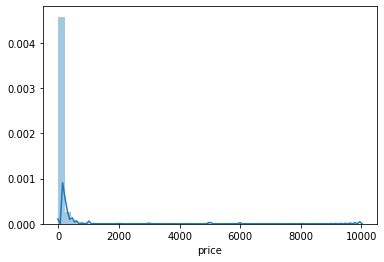

In [116]:
sns.distplot(dafa['price'])

###### statistical 

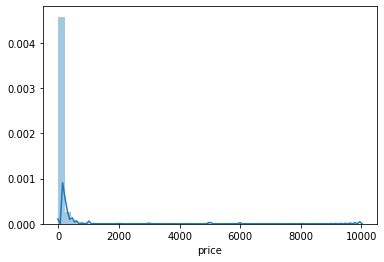

In [115]:
sns.distplot(da['price'])

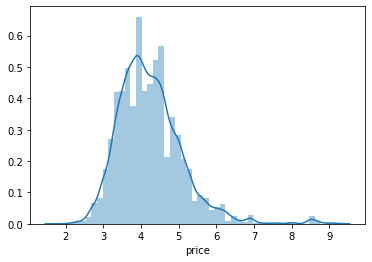

In [78]:
sns.distplot(np.log(da['price']))

In [79]:
import scipy.stats as stats

In [80]:
print('Mean',np.mean(np.log(da.price)))
print('Median',np.median(np.log(da.price)))
print('Std',np.std(np.log(da.price)))
print('mode',stats.mode(np.log(da.price))[0][0])


Mean 4.2415364586947195
Median 4.110873864173311
Std 0.8584900638132201
mode 3.912023005428146


We can see the mean, median, mode are near to each other. Therefore, it follows normal distribution.

In [81]:
da['log_price'] = np.log(da['price'])

In [82]:
# There fore the logging of the price make it fit for normal distribution
# Now it can used for checking statistical signifance

In [83]:
dafa.head(3)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within an hour,95.0,False,47.0,47.0,5.0,True,True,True,Apartment,Entire home/apt,6.0,1.0,2.0,4.0,Real Bed,18.0,130.0,15000.0,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,True,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,True,False,False,flexible,False,False,31.0,31.0,0.0,0.0,0.02
1,within an hour,95.0,False,47.0,47.0,5.0,True,True,True,Apartment,Entire home/apt,8.0,2.0,3.0,6.0,Real Bed,22.0,60.0,15000.0,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,True,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,True,False,strict_14_with_grace_period,False,False,31.0,31.0,0.0,0.0,0.21
2,within a few hours,100.0,False,2.0,2.0,6.0,True,True,True,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,41.0,33.0,10000.0,55.906121,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,True,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,True,False,False,moderate,False,False,2.0,0.0,2.0,0.0,3.05


###### host response time dependent with price

In [84]:
host_res_time = da[['host_response_time','log_price']]
host_res_time.head(2)

,host_response_time,log_price
0,3,4.867534
1,3,4.094345


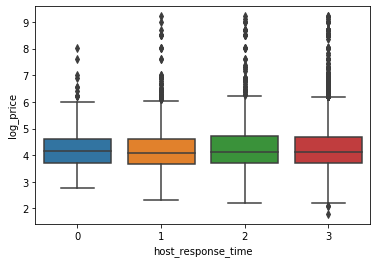

In [85]:
# boxplot
sns.boxplot(da['host_response_time'],da['log_price'])

In [86]:
# The mean looks similar check statistically

The means are not same,The host response time affect the price or not .

Hypothesis-

H0 - mean1 = mean2 = mean3 = mean4

Ha - not all the means are same

In [87]:
import statsmodels.api as sm
import   statsmodels.formula.api as smf
 
mod = smf.ols('log_price ~ host_response_time', data = da).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                          sum_sq       df         F    PR(>F)
host_response_time      0.872349      1.0  1.183593  0.276639
Residual            15004.553312  20358.0       NaN       NaN


Pvalue is 0.27 greater than 0.05 therefore the mean are same i.e the host reponse time  doesn't affect the pricing of the house

###### Is it true super host can earn more?

In [88]:
is_sup_host = da[da.host_is_superhost == True]['log_price'].to_list()
isnot_sup_host = da[da.host_is_superhost == False]['log_price'].to_list()

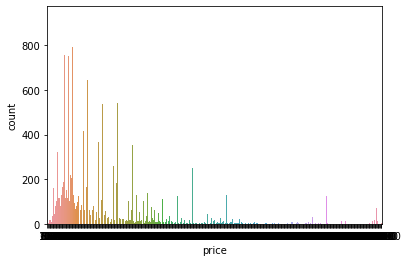

In [122]:
sns.countplot()

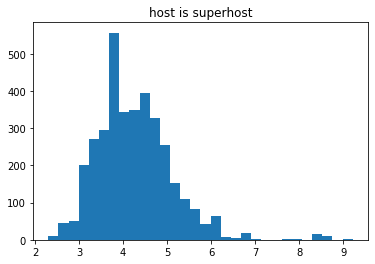

In [137]:
plt.title('host is superhost')

plt.hist(da[da['host_is_superhost'] == True]['log_price'],bins=30);


In [136]:
print(np.mean(da[da['host_is_superhost'] == False]['log_price']), 
      np.median(da[da['host_is_superhost'] == False]['log_price']),
      np.std(da[da['host_is_superhost'] == False]['log_price']))
print(np.mean(da[da['host_is_superhost'] == True]['log_price'])
      ,np.median(da[da['host_is_superhost'] == True]['log_price']),
      np.std(da[da['host_is_superhost'] == True]['log_price']))

4.235618412300582 4.0943445622221 0.8560379075691305
4.268949373458159 4.174387269895637 0.8692330737455285


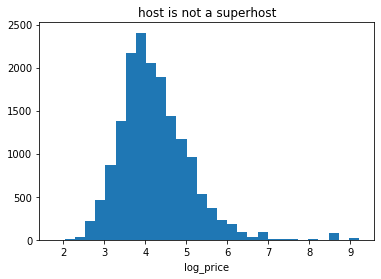

In [139]:
plt.title('host is not a superhost')
plt.xlabel('log_price')
plt.hist(da[da['host_is_superhost'] == False]['log_price'],bins=30);


In [89]:
t_statistic, p_value  =  stats.ttest_ind(is_sup_host,isnot_sup_host)
print('P Value ',p_value)
print('T statistics ',t_statistic)

P Value  0.03426117866388716
T statistics  2.1171268337911653


In [90]:
n1 = len(is_sup_host)
n2 = len(isnot_sup_host)
alpha = 0.05
tcr = stats.t.ppf(alpha/2,n1+n2-2)   
tcr

-1.9600805190660235

Yes, as we can see we can reject null hypothesis thus we can know the super host status is important for the host.

###### Average salary of superhost

In [91]:
# is_sup_host

###### Does the property and price are significanly dependent?

In [92]:
prop_time = da[['property_type','log_price']]
prop_time.head(2)

,property_type,log_price
0,1,4.867534
1,1,4.094345


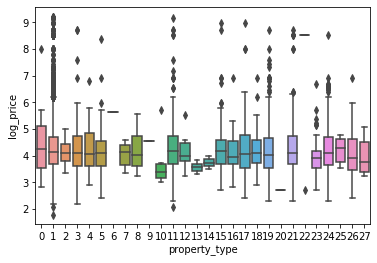

In [93]:
# boxplot
sns.boxplot(da['property_type'],da['log_price'])

In [118]:
import statsmodels.api         as     sm
import   statsmodels.formula.api as smf
 
mod = smf.ols('log_price ~ property_type', data = da).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                     sum_sq       df         F    PR(>F)
property_type      0.082929      1.0  0.112511  0.737306
Residual       15005.342732  20358.0       NaN       NaN


Thus the property type doesn't affect price.
MAy be The bedtype and space affect the price

###### how property type room type to price statistically


In [95]:
dafa.room_type.value_counts()

Private room       10389
Entire home/apt     9039
Hotel room           776
Shared room          156
Name: room_type, dtype: int64

In [96]:
room_type = da[['room_type','price']]
room_type.head(2)

,room_type,price
0,0,130.0
1,0,60.0


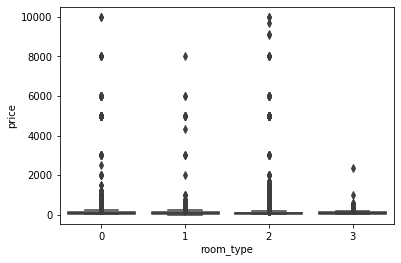

In [97]:
# boxplot
sns.boxplot(da['room_type'],da['price'])

In [142]:
mod = smf.ols('price ~ room_type', data = da).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

                df        sum_sq        mean_sq         F    PR(>F)
room_type      1.0  4.266868e+05  426686.750603  1.912815  0.166666
Residual   20358.0  4.541207e+09  223067.448277       NaN       NaN


In [99]:
dafa.room_type.value_counts()

Private room       10389
Entire home/apt     9039
Hotel room           776
Shared room          156
Name: room_type, dtype: int64

In [100]:
# Thus the room type does play a role in setting of price . 
# As we know there will be a price difference between private and shared room

###### Top host

In [101]:
top_host = pd.DataFrame()

In [102]:
top_host['name'] = data['host_name']

In [103]:
top_host['price'] = dafa['price']

In [104]:
top_host.dropna(inplace = True)

In [105]:
top_host.shape

(20360, 2)

In [106]:
earning = top_host.groupby('name').price.sum().sort_values(ascending = False).head(20)
# earning

<BarContainer object of 20 artists>

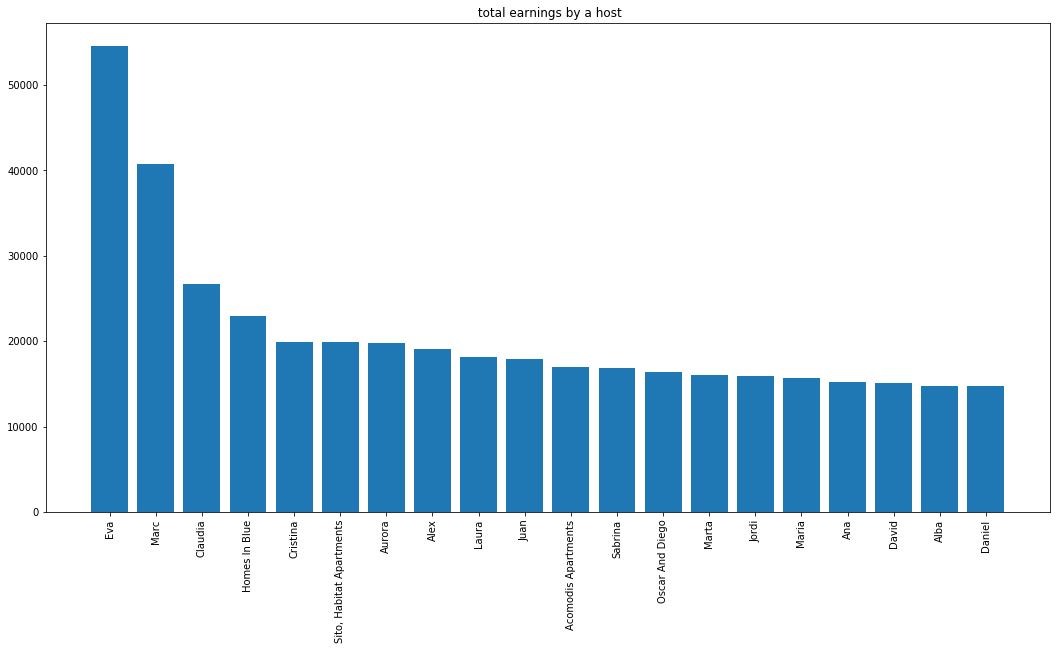

In [107]:
plt.figure(figsize = (18,9))
plt.title(' total earnings by a host')
plt.xticks(rotation = 'vertical')
plt.bar(earning.index,earning.values)


###### Base model:

In [108]:
X,y = da.drop(['price','log_price'],1), da.log_price

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
import statsmodels.api as sm

In [112]:
X_cons = sm.add_constant(X)
model = sm.OLS(y, X_cons.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     339.4
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:25:05   Log-Likelihood:                -19600.
No. Observations:               20360   AIC:                         3.930e+04
Df Residuals:                   20309   BIC:                         3.971e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
host_response_time                               0.0001      0.006      0.022      0.982      -0.012       0.013
host_response_rate                               0.0006      0.000      1.857      0.063   -3.35e-05       0.001
host_is_superhost                                0.0127      0.012      1.057      0.290      -0.011       0.036
host_listings_count                             -0.0007   7.51e-05     -9.949      0.000      -0.001      -0.001
host_total_listings_count                       -0.0007   7.51e-05     -9.949      0.000      -0.001      -0.001
host_verifications                              -0.0234      0.002    -10.836      0.000      -0.028      -0.019
host_has_profile_pic                            -0.0272      0.098     -0.277      0.782      -0.220       0.165
host_identity_verified                          -0.0003      0.010     -0.027      0.978      -0.020       0.019
is_location_exact                                0.0074      0.010      0.770      0.442      -0.011       0.026
property_type                                    0.0006      0.001      0.874      0.382      -0.001       0.002
room_type                                       -0.0067      0.005     -1.403      0.160      -0.016       0.003
accommodates                                     0.2060      0.005     42.420      0.000       0.196       0.216
bathrooms                                        0.0115      0.009      1.340      0.180      -0.005       0.028
bedrooms                                         0.0181      0.008      2.145      0.032       0.002       0.035
beds                                            -0.0583      0.005    -11.229      0.000      -0.069      -0.048
bed_type                                        -0.0183      0.038     -0.481      0.631      -0.093       0.056
amenities                                        0.0023      0.000      5.024      0.000       0.001       0.003
security_deposit                              5.047e-07   1.16e-07      4.334      0.000    2.76e-07    7.33e-07
cleaning_fee                                     0.0012      0.000      8.062      0.000       0.001       0.001
guests_included                                  0.0398      0.004     10.061      0.000       0.032       0.048
extra_people                                     0.0019      0.000      5.841      0.000       0.001       0.003
minimum_nights                                   0.0004      0.001      0.318      0.751      -0.002       0.003
maximum_nights                                   0.0002   4.45e-05      5.014      0.000       0.000       0.000
minimum_minimum_nights                          -0.0073      0.002     -4.809      0.000      -0.010      -0.004
maximum_minimum_nights          

In [114]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.4589065696867601
0.4435836553532613
